In [18]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

C:\Users\Akki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [20]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('C:/Users/Akki/PycharmProjects/akashweb/car_sales.csv', index_col=0,parse_dates=[0],date_parser=parser)

In [21]:
sales.head()

sales
month            
2016-01-01    445
2016-02-01    343
2016-03-01    464
2016-04-01    319
2016-05-01    106

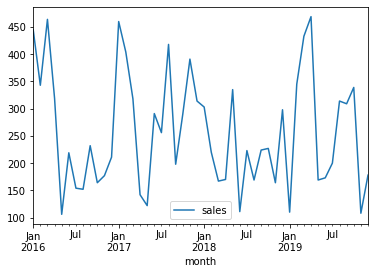

In [22]:
sales.plot()

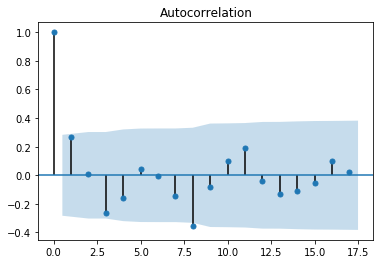

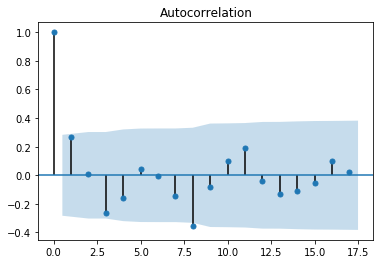

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [27]:
sales_diff = sales.diff(periods=1)
#integrated of order 1

In [29]:
sales_diff = sales_diff[1:]
sales_diff.head()

sales
month            
2016-02-01 -102.0
2016-03-01  121.0
2016-04-01 -145.0
2016-05-01 -213.0
2016-06-01  113.0

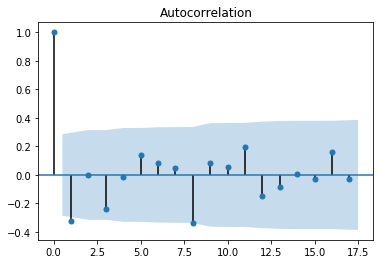

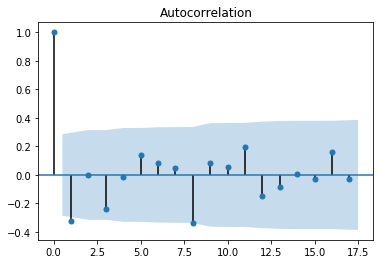

In [31]:
plot_acf(sales_diff)

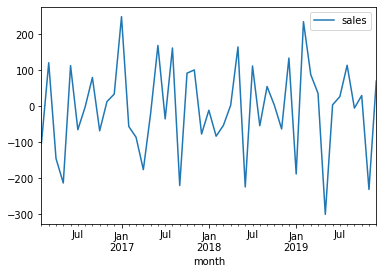

In [32]:
sales_diff.plot()

In [37]:
X= sales.values
train = X[0:38]
test = X[38:]
predictions = []

In [64]:
test.size

10

In [61]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [68]:
predictions = model_ar_fit.predict(start=38,end=48)

In [69]:
test

array([[433],
       [469],
       [169],
       [173],
       [200],
       [314],
       [309],
       [339],
       [108],
       [178]], dtype=int64)

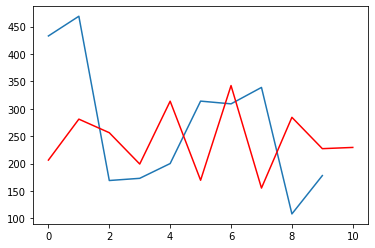

In [70]:
plt.plot(test)
plt.plot(predictions, color='red')

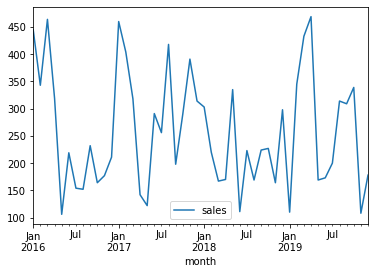

In [71]:
sales.plot()

In [72]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA


In [128]:
model_arima = ARIMA(train, order=(3,1,1))
model_arima_fit = model_arima.fit()

In [129]:
predictions_arima = model_arima_fit.forecast(steps=12)[0]
predictions_arima

array([207.08466604, 254.25184768, 190.44139428, 212.04356755,
       194.65593912, 206.40228105, 199.94995427, 202.61639961,
       198.09006199, 197.36217805, 194.34015701, 192.97008801])

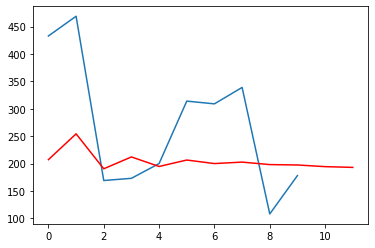

In [130]:
plt.plot(test)
plt.plot(predictions_arima, color='red')

In [124]:
import itertools
p=d=q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [126]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(model_arima_fit.aic)
    except:
        continue

463.8527408508623
464.08852190837837
463.25712915861567
465.052197896687


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


457.4539314323539
465.88094799468087
456.63290969736795
457.00809543969837
456.13880644036567
457.9917902223877
489.9478611050966
459.5644287233204
453.57876301204936
455.42873913725066
457.4371582355186
463.5608864013151
465.4455191098978


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


465.183083279826


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


463.29573787756846


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


458.00132681267996
460.5630503317502
456.4592223562613


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


457.0361910699288
471.56193743735554
455.11219432865465


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


454.92958404465116
454.82325490373535


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


456.813800029296
465.23534632284344
464.590677841816
467.217064266086
464.0692481934667


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


459.9338469565057
462.18171194269263
457.9863977163123
459.6925429446224
468.40217901043286
456.81284131529213


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


454.47614850882223


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


456.77507917236545


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


459.97677984104143
465.535688065932
464.42654440315334


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


461.86182735359733
463.10772267172536
458.68284418536643


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


459.19867819611915
468.84417983810584
457.96039183349967
466.6595900169681
462.64503640700207
467.2054373563314


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


459.9139148560895
457.98821712515445


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


455.924863201407
454.7747653220096


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


459.23483468911627
460.82771043715377
455.6215493463792
453.083094955972


C:\Users\Akki\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
